# Handwritten Number Recognition

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Loading and preprocessing the MNIST dataset

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the neural network model

In [11]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 784-dimensional vector
    Dense(128, activation='relu'),   # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Fully connected layer with 10 units (for digits 0-9) and softmax activation
])

# Compile the model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2598 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1148 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0784 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - accuracy: 0.9862


# Evaluate the model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 1s - loss: 0.0880 - accuracy: 0.9737 - 1s/epoch - 4ms/step

Test accuracy: 0.9736999869346619


# Make predictions

In [7]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


# Display predictions along with the actual images

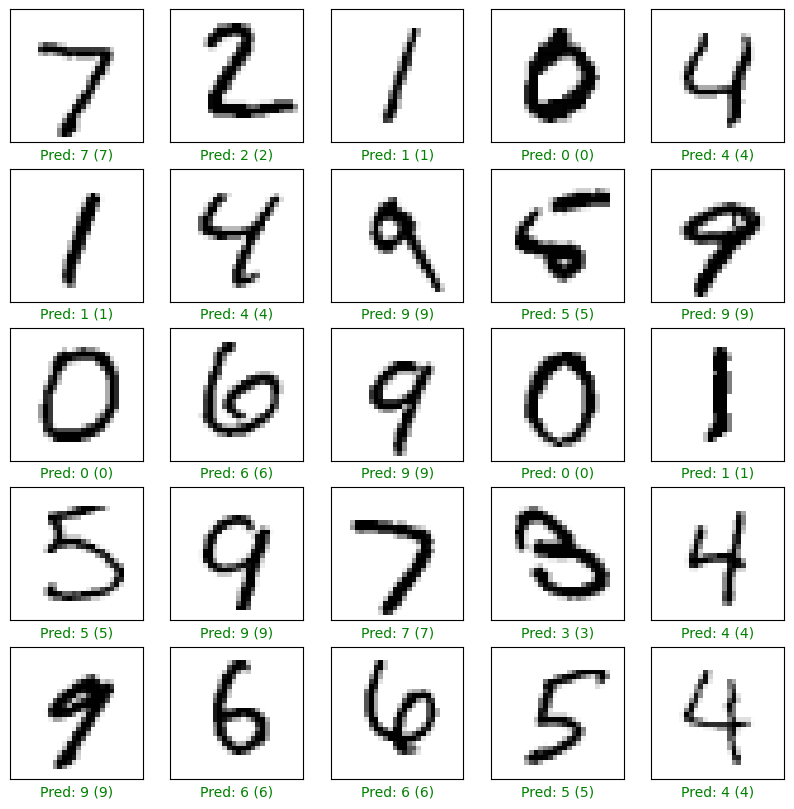

In [8]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label} ({true_label})", color=color)

plt.show()